# CERUG - Experiment 1
train: chinese

test: english

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sn

from qdanalysis.models import adapt_resnet50

2024-02-23 14:01:32.621167: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 14:01:32.654348: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 14:01:32.654374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 14:01:32.655241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 14:01:32.661072: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#classes and image sizes. manually pulled from experiment log
input_shape = (128, 128, 3)
writer_classes = ['Writer0101', 'Writer0202', 'Writer0303', 'Writer0404', 'Writer0505', 'Writer0606', 'Writer0707', 'Writer0808', 'Writer0909', 'Writer1010', 
                  'Writer1111', 'Writer1212', 'Writer1313', 'Writer1414', 'Writer1515', 'Writer1616', 'Writer1717', 'Writer1818', 'Writer1919', 'Writer2020', 
                  'Writer2121', 'Writer2222', 'Writer2323', 'Writer2424', 'Writer2525', 'Writer2626', 'Writer2727', 'Writer2828', 'Writer2929', 'Writer3030', 
                  'Writer3131', 'Writer3232', 'Writer3333', 'Writer3434', 'Writer3535', 'Writer3636', 'Writer3737', 'Writer3838', 'Writer3939', 'Writer4040', 
                  'Writer4141', 'Writer4242', 'Writer4343', 'Writer4444', 'Writer4545', 'Writer4646', 'Writer4747', 'Writer4848', 'Writer4949', 'Writer5050', 
                  'Writer5151', 'Writer5252', 'Writer5353', 'Writer5454', 'Writer5555', 'Writer5656', 'Writer5757', 'Writer5858', 'Writer5959', 'Writer6060', 
                  'Writer6161', 'Writer6262', 'Writer6363', 'Writer6464', 'Writer6565', 'Writer6666', 'Writer6767', 'Writer6868', 'Writer6969', 'Writer7070', 
                  'Writer7171', 'Writer7272', 'Writer7373', 'Writer7474', 'Writer7575', 'Writer7676', 'Writer7777', 'Writer7878', 'Writer7979', 'Writer8080', 
                  'Writer8181', 'Writer8282', 'Writer8383', 'Writer8484', 'Writer8585', 'Writer8686', 'Writer8787', 'Writer8888', 'Writer8989', 'Writer9090', 
                  'Writer9100', 'Writer9101', 'Writer9102', 'Writer9103', 'Writer9104', 'Writer9105', 'Writer9191', 'Writer9292', 'Writer9393', 'Writer9494', 
                  'Writer9595', 'Writer9696', 'Writer9797', 'Writer9898', 'Writer9999']

#evaluation dataset filepath
test_dir = './prepared datasets/CERUG/MIXED'
label_mode='categorical'

model_weights = './experiments/CERUG/2024_02_22/experiment_3/model_weights/weights'

lossfn = keras.losses.CategoricalCrossentropy()

In [3]:
model = adapt_resnet50(input_shape, len(writer_classes), False)
metrics = [
        keras.metrics.CategoricalAccuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall()]

model.load_weights(model_weights)
model.compile(loss=lossfn, metrics=metrics) #optimizer shouldn't be necessary

2024-02-23 14:01:35.167468: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21941 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


In [4]:
#due to nature of data, the test and train splits are defined beforehand
test_data = keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                              label_mode=label_mode, 
                                                              image_size=input_shape[:2])
writer_classes_test = test_data.class_names

Found 163057 files belonging to 105 classes.


In [5]:
results = model.evaluate(test_data, return_dict=True)

2024-02-23 14:01:44.689360: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


5096/5096 [==============================] - 87s 17ms/step - loss: 1.8269 - categorical_accuracy: 0.4773 - precision: 0.6621 - recall: 0.3555


In [6]:
labels_test = []
labels_pred = []
for data_test, labels in test_data:
    labels_test.extend(labels)
    
    predictions = model(data_test, training=False)
    labels_pred.extend(predictions)

In [7]:
#seems to work
san_test = keras.metrics.CategoricalAccuracy()
san_test.update_state(labels_test, labels_pred)
san_test.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.4773116>

In [8]:
labels_pred_cat = np.array(labels_pred)
labels_pred_cat.shape

(163057, 105)

In [9]:
labels_pred_cat = np.argmax(labels_pred_cat, axis=1)
labels_pred_cat.shape

(163057,)

In [10]:
labels_test_cat = np.argmax(np.array(labels_test), axis=1)
labels_test_cat.shape

(163057,)

In [11]:
print("true labels: ", labels_test_cat[:20])
print("pred labels: ", labels_pred_cat[:20])

true labels:  [ 6 95 26 87 34 62 27 88 79  6 23 41 42 48 13 51 72 71 57 61]
pred labels:  [ 6 89 10 87 34 62 27 88 91 20 19 41 42 69 13 51 86 58 91 62]


In [12]:
conf_matrix = confusion_matrix(labels_test_cat, labels_pred_cat)

<Axes: >

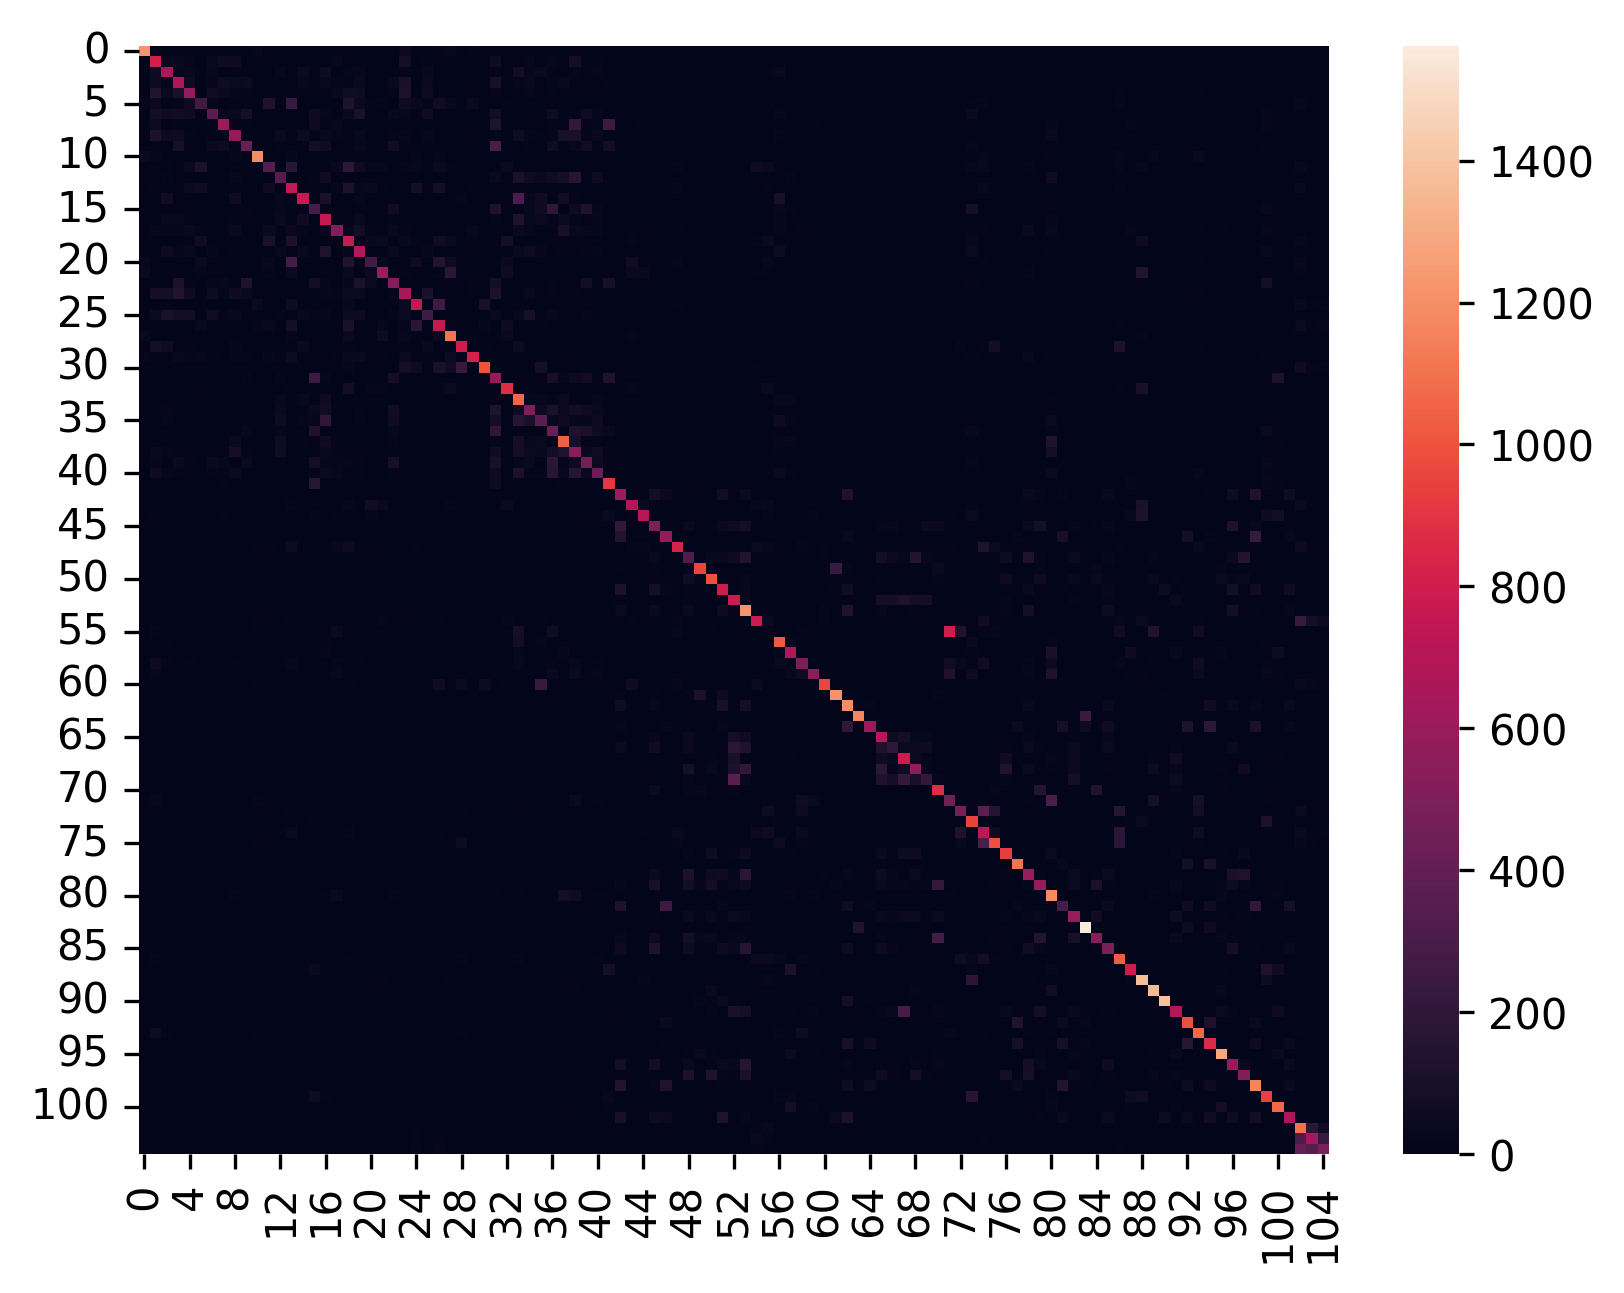

In [13]:
sn.heatmap(conf_matrix)